In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay, ConvexHull
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

In [2]:
def deltapeak(x,sigma):
    delta = np.exp(-(x)**2/(2*sigma))/np.sqrt(2*np.pi*sigma)
    return delta

def format_func(value, tick_number):
    # find number of multiples of pi/6
    N = int(np.round(6 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/6$"
    elif N == 2:
        return r"$\pi/3$"
    elif N == 3:
        return r"$\pi/2$"
    elif N == 4:
        return r"$2\pi/3$"
    elif N == 5:
        return r"$5\pi/6$"
    elif N == 6:
        return r"$\pi$"
    elif N % 6 > 0:
        if N % 3 == 0:
            return r"${0}\pi/2$".format(N // 3)
        if N%2 ==0: 
            return r"${0}\pi/3$".format(N // 2)
        else:
            
            return r"${0}\pi/6$".format(N)
    else:
        return r"${0}\pi$".format(N // 6)



In [3]:
def brdf_lambertian(rhod,theta_i,theta_r,phi_i,phi_r):
    f = np.zeros(2*res*res)
    for i in range(2*res*res):
            f[i] = rhod/np.pi
    return f



def brdf_specular3(rhod,theta_i,theta_r,phi_i,phi_r,sigma):
    
    z = rhod*(deltapeak(theta_r-theta_i,sigma)*deltapeak(phi_r-phi_i-np.pi,sigma)/(np.cos(theta_r)*np.sin(theta_r)+epsilon))
    return z

def brdf_specular4(rhod,theta_i,theta_r,phi_i,phi_r,sigma):
    Rs = abs((np.cos(theta_i)-np.sqrt(nwater**2-np.sin(theta_i)**2))/(np.cos(theta_i)+np.sqrt(nwater**2-np.sin(theta_i)**2)))**2
    Rp = abs(((nwater**2)*np.cos(theta_i)-np.sqrt(nwater**2-np.sin(theta_i)**2))/((nwater**2)*np.cos(theta_i)+np.sqrt(nwater**2-np.sin(theta_i)**2)))**2
    z = (Rs+Rp)/2*brdf_specular3(rhod,theta_i,theta_r,phi_i,phi_r,sigma)
    return z


def brdf_lambertian2(rhod,theta_i,theta_r,phi_i,phi_r):
    z = rhod*(np.cos(theta_i)*np.cos(theta_r))**0/np.pi
    return z
def brdf_opposition(rhod,theta_i,theta_r,k):
    z =  rhod*(np.cos(theta_i)*np.cos(theta_r))**k/np.pi
    return z

def brdf_opposition2(rhod,theta_i,theta_r,k):
    z =  rhod*(np.cos(theta_i)*np.cos(theta_r)+epsilon)**(-k)/np.pi
    return z
def brdf_seeliger(rhod,theta_i,theta_r,phi_i,phi_r):
    cos_alpha = np.cos(theta_i)*np.cos(theta_r)+np.cos(phi_r-phi_i)*np.sin(theta_i)*np.sin(theta_r)
    alpha = np.arccos(cos_alpha)    
    z = rhod*2/(3*np.pi**2)*(np.sin(alpha)+(np.pi-alpha)*np.cos(alpha)/(np.cos(theta_i)+np.cos(theta_r)+epsilon))
    return z

def brdf_seeliger2(rhod,theta_i,theta_r,phi_i,phi_r):
    z = rhod*1/(4*np.pi)*1/(np.cos(theta_i)+np.cos(theta_r)+epsilon)
    return z

In [14]:
epsilon = 0.000000001
sigma = 0.001
nwater = 4/3
res = 200
k = 0.5
rhod = 1

theta_i = 0
phi_i = np.pi/4

phi_r = np.linspace(0,2*np.pi,2*res)
theta_r = np.linspace(0,np.pi/2,res)


theta_i_opp = np.linspace(0,np.pi/2,res)

phi_mesh, theta_mesh = np.meshgrid(phi_r,theta_r)

theta_imeshopp, theta_rmeshopp = np.meshgrid(theta_i_opp, theta_r)
phi_r_opp = phi_i+np.pi

In [15]:
brdfLamb = brdf_lambertian(rhod,theta_i,theta_r,phi_i,phi_r)
brdfLamb_grid = brdfLamb.reshape((2*res,res),order = 'F')

brdfLamb2 = brdf_lambertian2(rhod,theta_i,theta_mesh,phi_i,phi_mesh)


brdfSpec3 = brdf_specular3(rhod,theta_i,theta_mesh,phi_i,phi_mesh,sigma)
brdfSpec4 = brdf_specular4(rhod,theta_i,theta_mesh,phi_i,phi_mesh,sigma)


brdfopp1 = brdf_opposition(rhod,theta_imeshopp,theta_rmeshopp,k)
brdfopp2 = brdf_opposition2(rhod,theta_imeshopp,theta_rmeshopp,k)


brdfSeel = brdf_seeliger(rhod,theta_i,theta_mesh,phi_i,phi_mesh)
brdfSeel2 = brdf_seeliger(rhod,theta_imeshopp,theta_rmeshopp,phi_i,phi_r_opp)
brdfSeel3 = brdf_seeliger2(rhod,theta_i,theta_mesh,phi_i,phi_mesh)

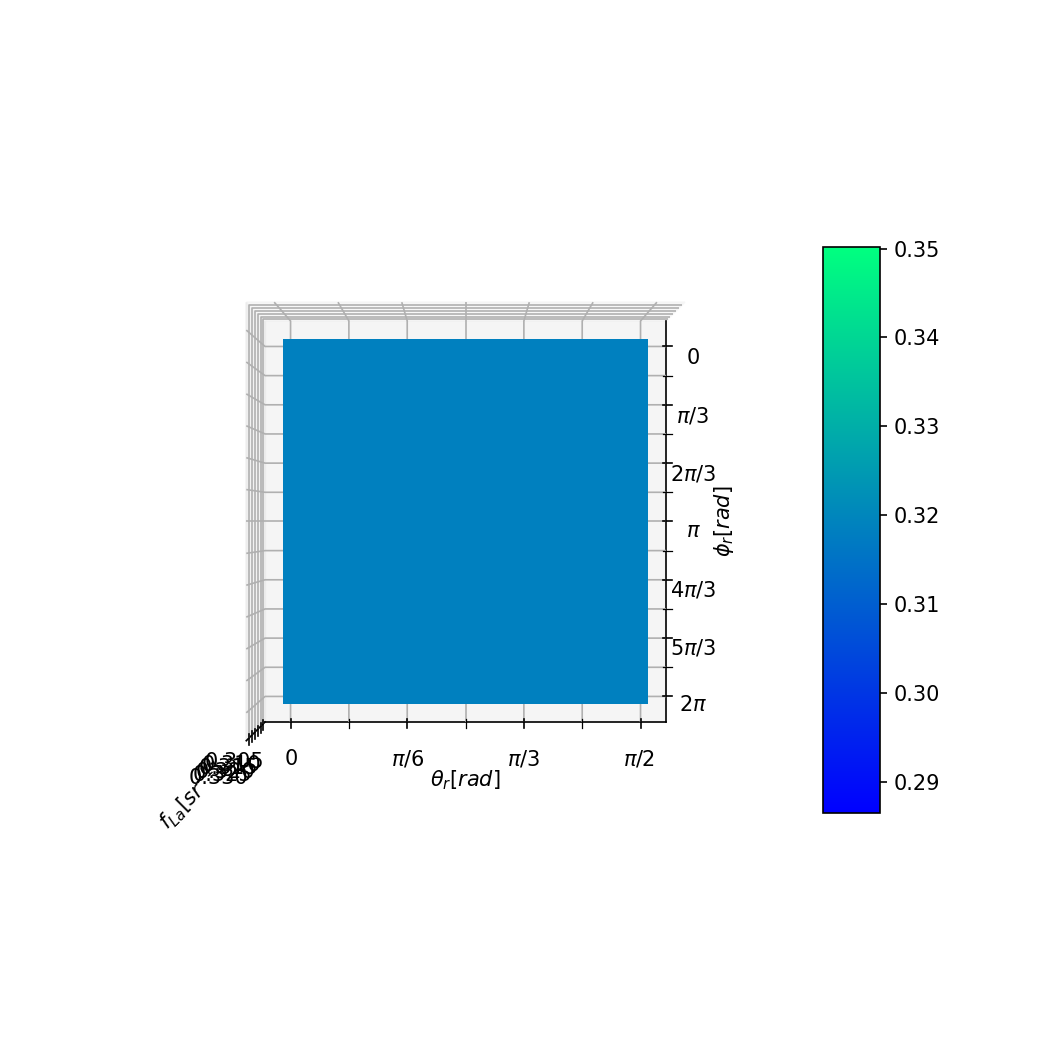

In [7]:
# plotting the brdf's
%matplotlib widget
fig = plt.figure(figsize=(7,7), dpi = 150)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(phi_mesh,theta_mesh, brdfLamb2, rstride=1, cstride=1, cmap='winter', edgecolor='none')
ax.set_xlabel('$\phi_r [rad]$')
ax.set_ylabel('$\\theta_r [rad]$')
ax.set_zlabel(r'$f_{La} [sr^{-1}]$')

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig.colorbar(surf, shrink=0.7, aspect=10) 
ax.view_init(90, 0)    

#phi_i = pi/4 theta_i = pi/3
plt.show()


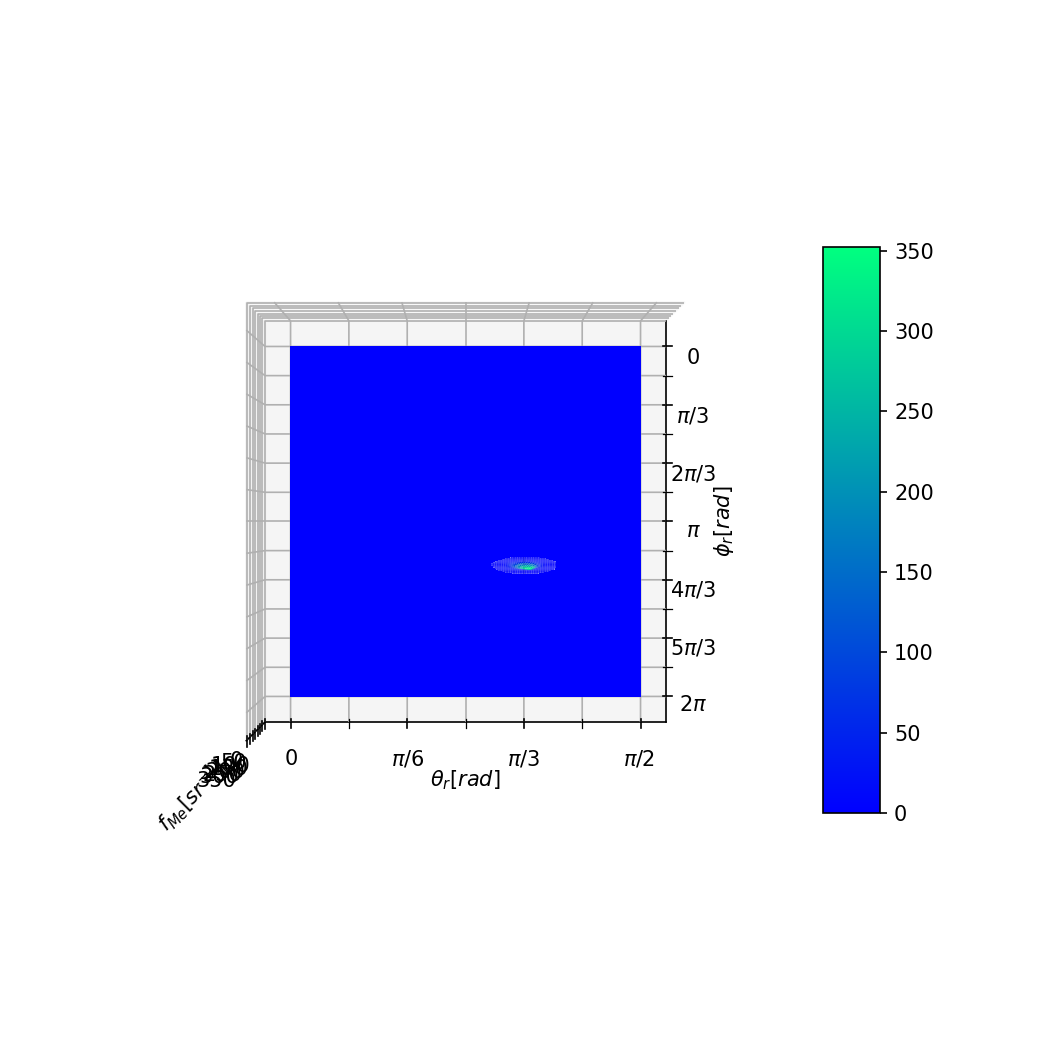

In [12]:
%matplotlib widget
fig = plt.figure(figsize=(7, 7), dpi = 150)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(phi_mesh,theta_mesh, brdfSpec3, rstride=1, cstride=1, cmap='winter', edgecolor='none')
ax.set_xlabel('$\phi_r [rad]$')
ax.set_ylabel('$\\theta_r [rad]$')
ax.set_zlabel('$f_{Me} [sr^{-1}]$')


ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

fig.colorbar(surf, shrink=0.7, aspect=10) 
ax.view_init(90, 0)
plt.show()

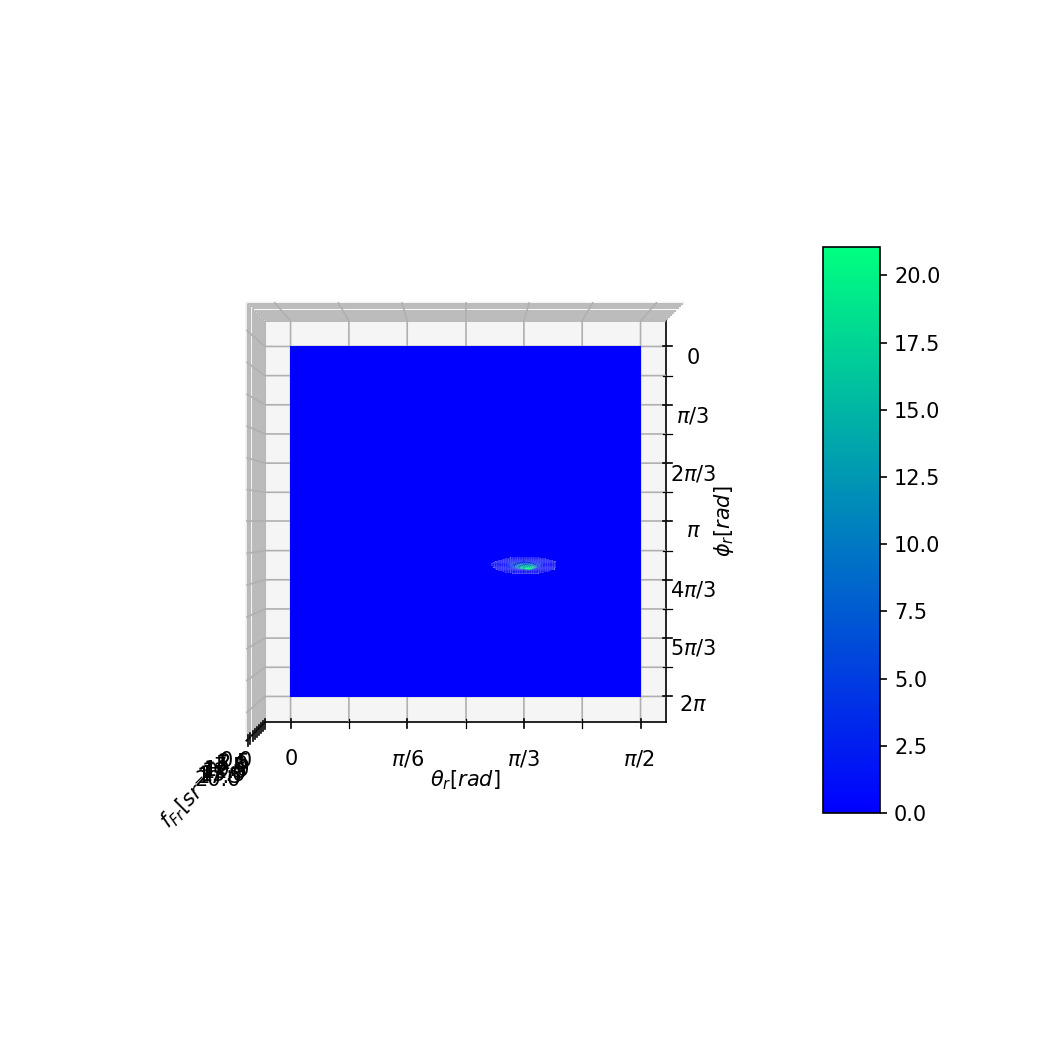

In [13]:
%matplotlib widget
fig = plt.figure(figsize=(7, 7), dpi = 150)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(phi_mesh,theta_mesh, brdfSpec4, rstride=1, cstride=1, cmap='winter', edgecolor='none')
ax.set_xlabel('$\phi_r [rad]$')
ax.set_ylabel('$\\theta_r [rad]$')
ax.set_zlabel('$f_{Fr} [sr^{-1}]$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
#ax.set_title('Water glint, phi_i = pi/4, theta_i = pi/3, sigma='+str(sigma))
fig.colorbar(surf, shrink=0.7, aspect=10) 
ax.view_init(90, 0)
plt.show()

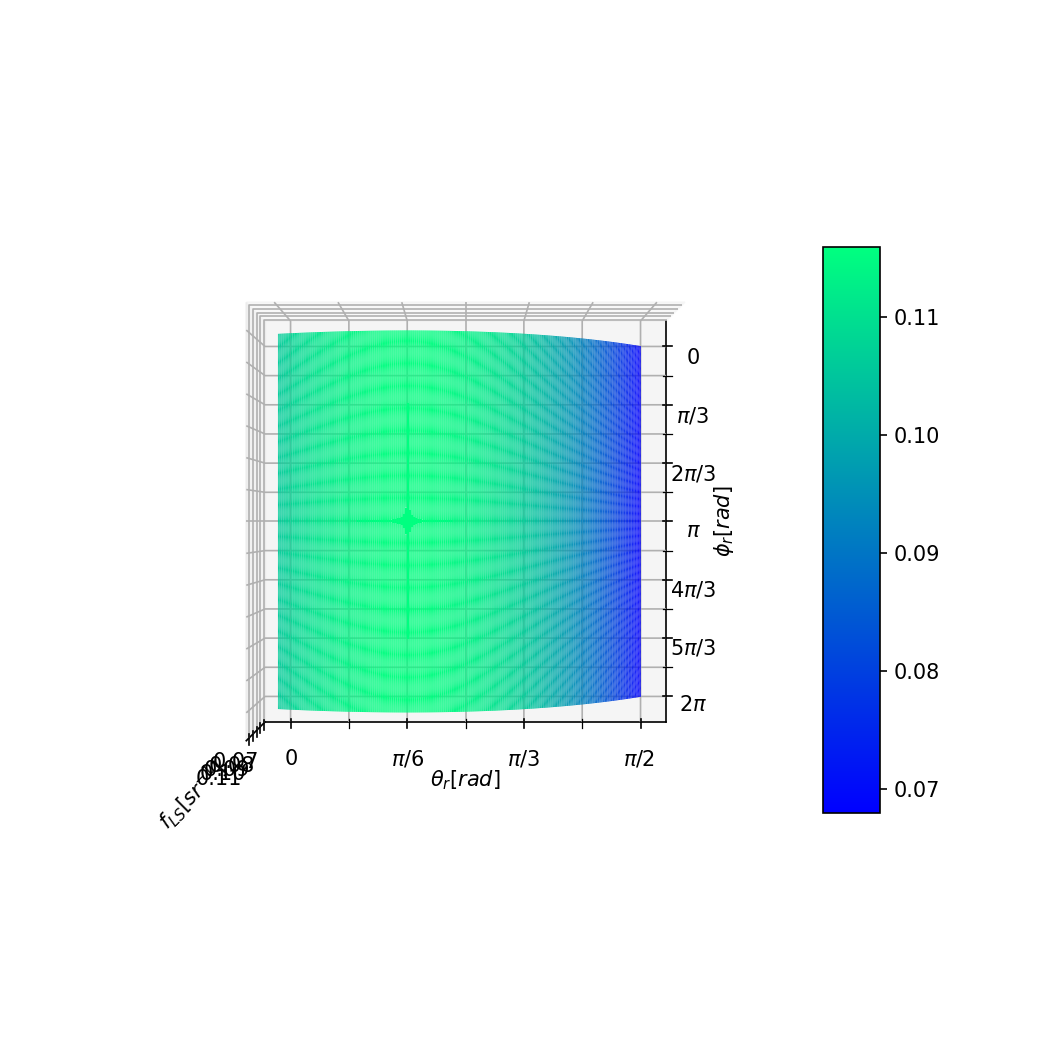

In [16]:
%matplotlib widget
fig = plt.figure(figsize=(7, 7), dpi = 150)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(phi_mesh,theta_mesh, brdfSeel, rstride=1, cstride=1, cmap='winter', edgecolor='none')
ax.set_xlabel('$\phi_r [rad]$')
ax.set_ylabel('$\\theta_r [rad]$')
ax.set_zlabel('$f_{LS} [sr^{-1}]$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
#ax.set_title('Water glint, phi_i = pi/4, theta_i = pi/3, sigma='+str(sigma))
fig.colorbar(surf, shrink=0.7, aspect=10) 
ax.view_init(90, 0)
plt.show()

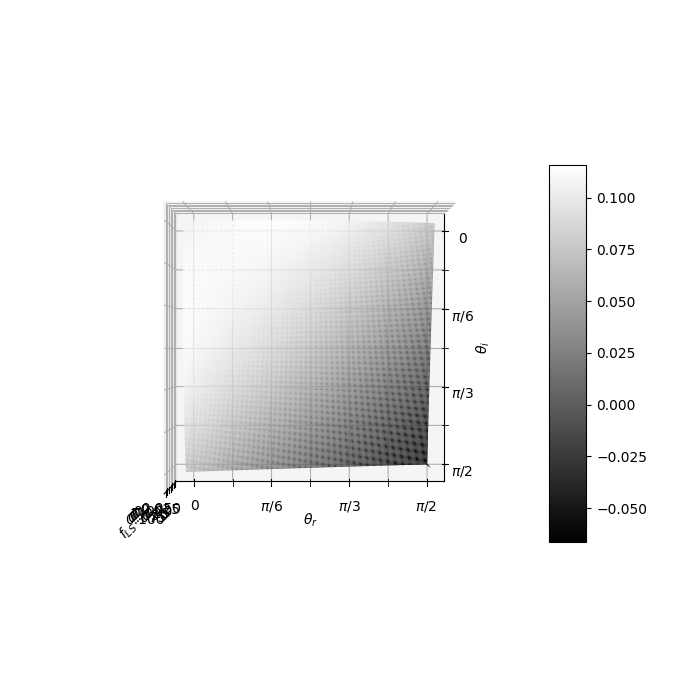

In [65]:
%matplotlib widget
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(theta_imeshopp, theta_rmeshopp, brdfSeel2, rstride=1, cstride=1, cmap='gray', edgecolor='none')
ax.set_xlabel('$\\theta_i$')
ax.set_ylabel('$\\theta_r$')
ax.set_zlabel('$f_{LS}$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
#ax.set_title('Water glint, phi_i = pi/4, theta_i = pi/3, sigma='+str(sigma))
fig.colorbar(surf, shrink=0.7, aspect=10) 
ax.view_init(90, 0)
plt.show()

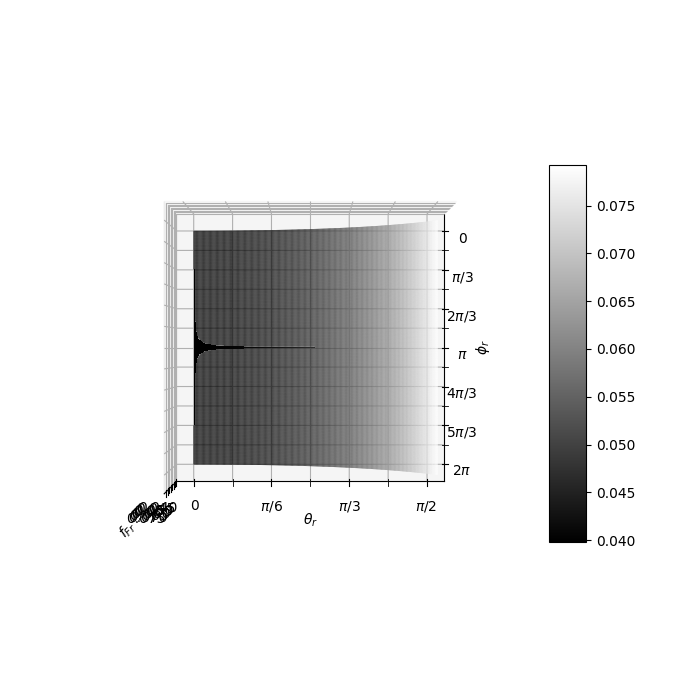

In [73]:
%matplotlib widget
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(phi_mesh,theta_mesh, brdfSeel3, rstride=1, cstride=1, cmap='gray', edgecolor='none')
ax.set_xlabel('$\phi_r$')
ax.set_ylabel('$\\theta_r$')
ax.set_zlabel('$f_{Fr}$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
#ax.set_title('Water glint, phi_i = pi/4, theta_i = pi/3, sigma='+str(sigma))
fig.colorbar(surf, shrink=0.7, aspect=10) 
ax.view_init(90, 0)
plt.show()